# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [60]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [61]:
url = 'power_demand_vs_temperature.csv'
data = pd.read_csv(url)
data.head()

,date,demand,temp
0,2015-01-01,1.736065,1.7
1,2015-01-02,1.831672,2.2
2,2015-01-03,1.714934,14.4
3,2015-01-04,1.628577,15.6
4,2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [62]:
data.describe()

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [63]:
rows = data.shape[0]
rows_without_nan = data.dropna().shape[0]
rows_with_nulls = rows - rows_without_nan
rows_with_nulls

0

### Create X and y 

In [64]:
data = data.drop(['date'], axis=1)
X = data.drop(['demand'], axis=1)
y = data['demand']
print(X.shape)
print(y.shape)

(1096, 1)
(1096,)


### Plot the distribution



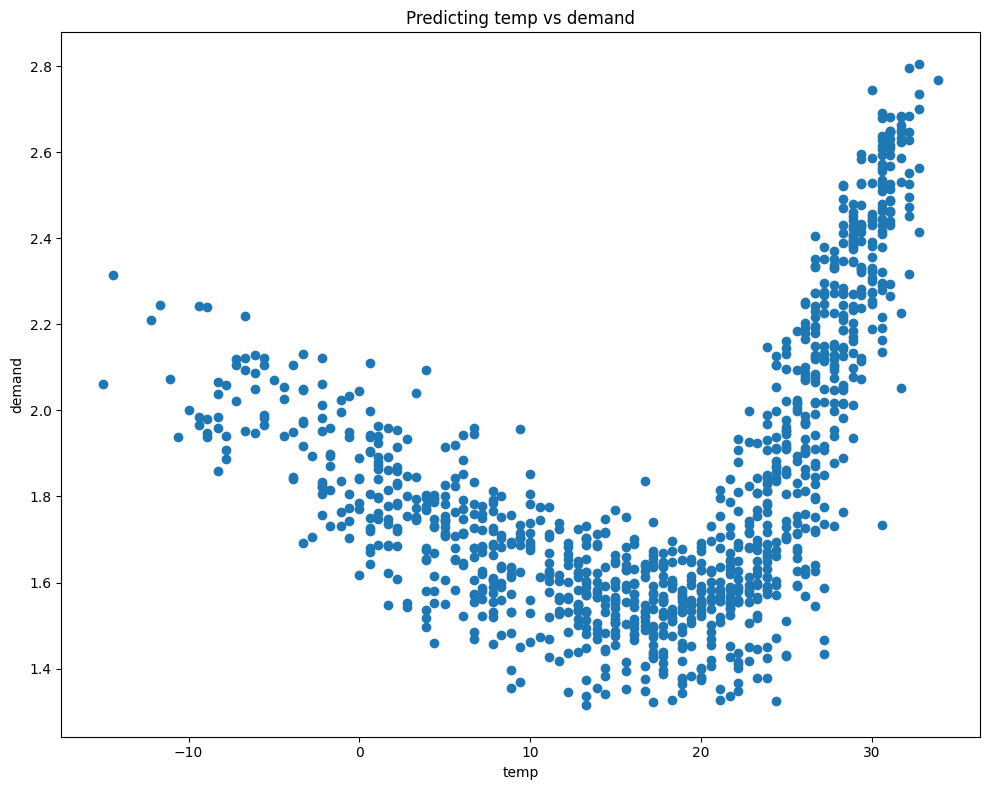

In [65]:

plt.figure(figsize=(10, 8))
plt.scatter(X['temp'], y)
plt.xlabel('temp')
plt.ylabel('demand')

plt.title('Predicting temp vs demand')
plt.tight_layout()
plt.show()

### Divide the dataset in train and test splits

In [66]:
train_size = 0.7

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

print(f"There are {X_train.shape[0]} samples in the training set")
print(f"There are {X_test.shape[0]} samples in the test set")

There are 767 samples in the training set
There are 329 samples in the test set


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [71]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def my_metrics(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Calcola la somma dei quadrati della regressione (SSR)
    ssr = np.sum((y_pred - np.mean(y_true)) ** 2)

    # Numero di predittori
    k = X.shape[1]
    
    # Calcola MSM (Mean Square Model)
    msm = ssr / k
    
    # Calcola la somma dei quadrati degli errori (SSE)
    sse = np.sum((y_true - y_pred) ** 2)
    
    # Calcola MSE (Mean Square Error)
    mse_error = sse / (len(y_true) - k - 1)
    
    # Calcola la statistica F
    f_statistics = msm / mse_error

    # Calcola i gradi di libertà
    df_regression = k
    df_error = len(y_true) - k - 1
    
    # Calcola il p-value
    p_value = 1 - stats.f.cdf(f_statistics, df_regression, df_error)
    return{
        'mse': mse,
        #'rmse': rmse,
        'r2': r2,
        'f_statistics': f_statistics,
        'p_value': p_value
    }

## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [72]:
model = linear_model.LinearRegression()
model.fit(X=X_train, y=y_train)

y_test_lin = model.predict(X_test)
metrics_lin = my_metrics(y_test, y_test_lin, X_test)
metrics_lin

{'mse': np.float64(0.10165083485105061),
 'r2': 0.16809034828105496,
 'f_statistics': np.float64(44.57637667770472),
 'p_value': np.float64(1.0502720915184227e-10)}

 Mean squared error: 	0.10016
 r2 score: 		0.1803
 f-statistic: 		53.273
 p-value: 		2.2197e-12


#### Visualize the prediction of the model 

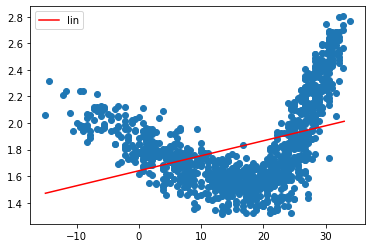

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

LinearRegression()

 Mean squared error: 	0.033456
 r2 score: 		0.72619
 f-statistic: 		384.89
 p-value: 		1.1102e-16


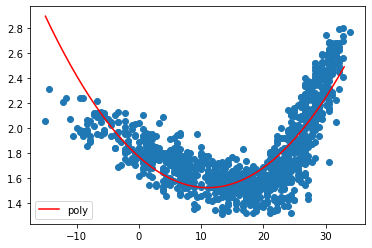

## Third experiment

#### Polynomial degree = 3

Polynomial degree = 3


LinearRegression()

 Mean squared error: 	0.021749
 r2 score: 		0.822
 f-statistic: 		502.32
 p-value: 		1.1102e-16


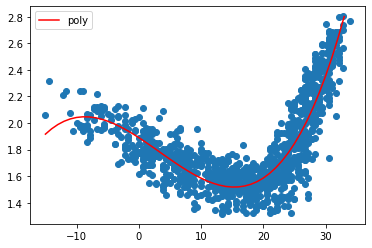

## Fourth experiment
### Polynomial degree = 4

Polynomial degree = 4


LinearRegression()

 Mean squared error: 	0.021334
 r2 score: 		0.8254
 f-statistic: 		390.05
 p-value: 		1.1102e-16


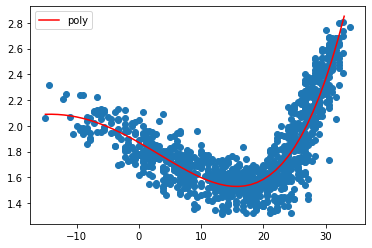

## Compare the performance of the four models

,linear,polynomial d = 2,polynomial d = 3,polynomial d = 4
rmse,1.001591e-01,3.345625e-02,2.174942e-02,2.133387e-02
r2,-5.366169e+00,5.756325e-01,7.843318e-01,7.923317e-01
f-statistic,5.327309e+01,3.848865e+02,5.023183e+02,3.900454e+02
p-value,2.219669e-12,1.110223e-16,1.110223e-16,1.110223e-16
